In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
daily_visitors = pd.read_csv("VenueDailyVisitors.csv", index_col = 0)
distance = pd.read_csv("VenueDistance.csv", index_col = 0)
spend = pd.read_csv("VenueSpend.csv", index_col = 0)

In [3]:
daily_visitors.head()

,AXM,WXV,TRV,CWN,DKS,UZO,WFI,XPE,YVW,WRL,...,GLQ,XLA,XXO,AWF,YDI,XJT,PDT,ZLH,XFP,VLS
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2019,60,84,72,263,203,56,101,76,0,83,...,66,83,91,200,0,84,332,67,77,57
02/01/2019,64,100,80,225,204,69,83,87,0,90,...,75,87,79,172,0,82,365,75,73,67
03/01/2019,45,88,80,175,153,69,87,73,0,66,...,63,85,105,143,0,80,247,60,69,65
04/01/2019,75,90,81,172,122,70,86,71,0,70,...,67,77,80,92,0,83,216,72,45,60
05/01/2019,53,95,74,152,106,79,78,78,0,57,...,56,81,75,100,0,83,163,61,64,57


In [4]:
distance.head()

,Max travel distance (mls)
Id,
AXM,5
WXV,14
TRV,12
CWN,14
DKS,28


In [5]:
spend.head()

,Avg spend (£)
Id,
AXM,12
WXV,26
TRV,13
CWN,17
DKS,12


In [6]:
data = pd.DataFrame(daily_visitors.mean(), columns = ['Average daily visitors'], index = distance.index)

In [7]:
data['Distance'] = distance.values

In [8]:
data['Spend'] = spend.values

In [9]:
data.corr()

,Average daily visitors,Distance,Spend
Average daily visitors,1.000000,0.937998,0.114762
Distance,0.937998,1.000000,0.099375
Spend,0.114762,0.099375,1.000000


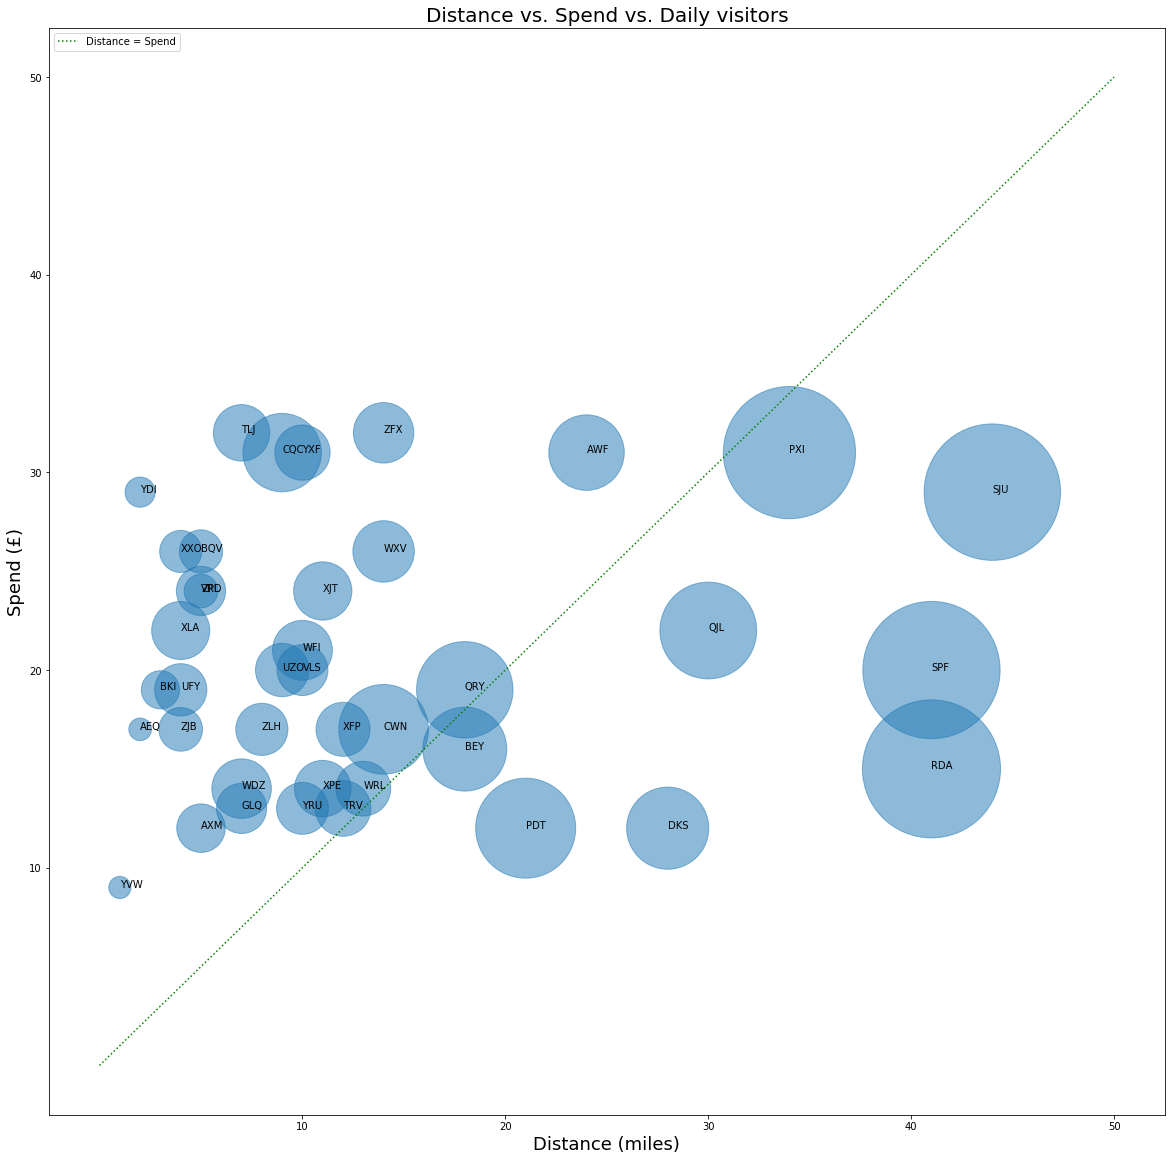

<Figure size 432x288 with 0 Axes>

In [10]:
data['Bubblesize'] = data['Average daily visitors'] * 40

plt.figure(figsize = (20, 20))
plt.scatter(data['Distance'], data['Spend'], s = data['Bubblesize'], alpha = 0.5)
plt.xticks([10, 20, 30, 40, 50, 60])
plt.yticks([10, 20, 30, 40, 50, 60])
plt.title('Distance vs. Spend vs. Daily visitors', fontsize=20)
plt.xlabel('Distance (miles)', fontsize=18)
plt.ylabel('Spend (£)', fontsize=18)

for i, name in enumerate(data.index):
    plt.annotate(name,(data['Distance'][i], data['Spend'][i]))
    
plt.plot([0,50], [0,50], linestyle=':', color='g', label= 'Distance = Spend')
plt.legend(loc=2)
plt.show()
plt.savefig("Visualisation 4 - Distance vs. Spend vs. Daily visitors.png")